In [8]:
import sys

In [9]:
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install gym

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [10]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output
from gym.envs.toy_text.frozen_lake import generate_random_map

import matplotlib.pyplot as plt
import gc
gc.disable() #Disable automatic garbage collection.

In [11]:
env = gym.make("FrozenLake-v1")
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [12]:
num_episodes = 20000
max_steps_per_episode = 100

learning_rate = 0.03 #Between 0 and 1. How quickly the agent abandons the previous value in the Q table for the new value. 0: Agent learns nothing and only uses prior knowledge. 1: Agent considers only the most recent information.
discount_rate = 0.97

exploration_rate = 1
max_exploration_rate = 1    #1: Guaranteed that agent starts the game by 100% exploring the environment
min_exploration_rate = 0    #0: Agent does not explore at all. Agent only exploits (chooses actions to get max points)
exploration_decay_rate = 0.001

*** AVG reward per 1000 episodes***

1000 :  0.03100000000000002
2000 :  0.09100000000000007
3000 :  0.2930000000000002
4000 :  0.5030000000000003
5000 :  0.6680000000000005
6000 :  0.7320000000000005
7000 :  0.7100000000000005
8000 :  0.7300000000000005
9000 :  0.7130000000000005
10000 :  0.7270000000000005
11000 :  0.7150000000000005
12000 :  0.7320000000000005
13000 :  0.7190000000000005
14000 :  0.7430000000000005
15000 :  0.7210000000000005
16000 :  0.7220000000000005
17000 :  0.7310000000000005
18000 :  0.7470000000000006
19000 :  0.7300000000000005
20000 :  0.7310000000000005


 *** Q-table ***

[[0.29779536 0.25523164 0.25530131 0.25542308]
 [0.14040203 0.12724777 0.11780591 0.24914414]
 [0.22464054 0.10618662 0.11376607 0.11118938]
 [0.0720679  0.00417623 0.00140736 0.00467002]
 [0.32071882 0.22049541 0.2124183  0.2125089 ]
 [0.         0.         0.         0.        ]
 [0.08877121 0.10629944 0.20442338 0.04471719]
 [0.         0.         0.         0.        ]
 [0.23313715 0

(0.0, 1.0)

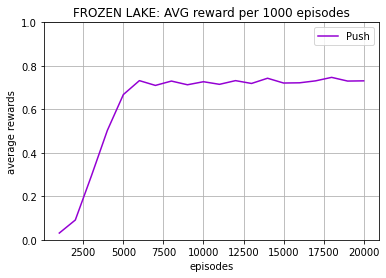

In [13]:
rewards_all_episodes = []

# Q-Learning algorithm
for episode in range(num_episodes):
    
    # random_map = generate_random_map(size=4, p=0.8)
    # env = gym.make("FrozenLake-v0", desc=random_map)
    env = gym.make("FrozenLake-v1")
    state = env.reset()

    done = False
    rewards_current_episode = 0

    for step in range (max_steps_per_episode):

        # Exploration / Exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()
        
        new_state, reward, done, info = env.step(action)
        
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

        state = new_state
        rewards_current_episode += reward

        if done == True:
            break

    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)

    rewards_all_episodes.append(rewards_current_episode)

# Calculate reward across all episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes), num_episodes / 1000)
count = 1000
count_plot = [] #for plotting
r_plot = [] #for plotting
print("*** AVG reward per 1000 episodes***\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count_plot.append(count) #for plotting. 
    r_plot.append(sum(r/1000)) #for plotting
    count += 1000


# Print Q table
print("\n\n *** Q-table ***\n")
print(q_table)


#Plot results 
%matplotlib inline
#Name x-axis, y-axis and whole graph
plt.xlabel("episodes")
plt.ylabel("average rewards")
plt.title("FROZEN LAKE: AVG reward per 1000 episodes")
# Plotting all the graphs
plt.plot(count_plot, r_plot, color="darkviolet", label = "Push")
plt.grid()
plt.legend()
#Load the display window
plt.show
#set y-axis limit
plt.ylim([0, 1])

In [14]:
# random_map = generate_random_map(size=4, p=0.8)
# env = gym.make("FrozenLake-v0", desc=random_map)
env = gym.make("FrozenLake-v1")
for episode in range(1): #number of episodes played through - up to 20,000
    state = env.reset()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(0.5) #changed from 1

    for step in range(max_steps_per_episode):        
        clear_output(wait=True)
        env.render()
        time.sleep(0.1) #changed from 0.3
        
        action = np.argmax(q_table[state,:])        
        new_state, reward, done, info = env.step(action)
        
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                print("****You reached the goal!****")
                time.sleep(0.5) #changed from 3
            else:
                print("****You fell through a hole!****")
                time.sleep(0.5) #changed from 3
            clear_output(wait=True)
            break
            
        state = new_state
        
env.close()

  (Down)
SFFF
FHFH
FFFH
HFFG
****You reached the goal!****
